In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_excel('data/SAWS/SAWS_SSOs_2009-2018Mar_UploadData.xlsx', sep=', ', keep_default_na=True)

In [46]:
df.head()

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,...,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3
0,6582,567722.0,NaN,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
1,6583,567723.0,NaN,2019-03-10,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
2,6581,567714.0,NaN,2019-03-09,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,...,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0
3,6584,567713.0,NaN,2019-03-09,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
4,6580,567432.0,NaN,2019-03-06,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0


In [47]:
df.columns = map(str.lower, df.columns)

In [48]:
df.head(2).T

,0,1
sso_id,6582,6583
inspkey,567722,567723
servno,NaN,NaN
reportdate,2019-03-10 00:00:00,2019-03-10 00:00:00
spill_address,3200,6804
spill_st_name,THOUSAND OAKS DR,S FLORES ST
total_gal,2100,80
galsret,2100,0
gal,2100,80
spill_start,3/10/2019 1:16:00 PM,3/10/2019 2:25:00 PM


In [13]:
df.isnull().sum()

sso_id                   0
inspkey                797
servno                2715
reportdate               0
spill_address            0
spill_st_name            0
total_gal                0
galsret                475
gal                      0
spill_start              0
spill_stop               0
hrs                      3
cause                    0
comments               533
actions                  8
watershed                0
unitid                   4
unitid2                244
discharge_to             4
discharge_route        827
council_district       322
ferguson                30
month                    0
year                     0
week                     0
earz_zone             1318
expr1029                 7
pipediam               190
pipelen                190
pipetype               190
instyear               118
dwndpth               3183
upsdpth               3183
inches_no              487
rainfall_less3         542
spill address           43
sewerassetexp         3026
n

In [14]:
df.dtypes

sso_id                         int64
inspkey                      float64
servno                       float64
reportdate            datetime64[ns]
spill_address                  int64
spill_st_name                 object
total_gal                      int64
galsret                      float64
gal                          float64
spill_start                   object
spill_stop                    object
hrs                          float64
cause                         object
comments                      object
actions                       object
watershed                     object
unitid                        object
unitid2                       object
discharge_to                  object
discharge_route               object
council_district             float64
ferguson                      object
month                          int64
year                           int64
week                           int64
earz_zone                    float64
expr1029                      object
p

In [15]:
df.rename(index=str, columns={'public notice':'public_notice', 'spill address': 'spill_address_full'}, inplace=True)

In [16]:
df.num_spills_24mos[df.num_spills_24mos > 1].value_counts()

2.0     180
3.0      75
4.0      32
5.0      27
6.0      19
7.0      12
8.0       7
9.0       5
10.0      1
11.0      1
12.0      1
13.0      1
Name: num_spills_24mos, dtype: int64

### Most repetitive address

In [17]:
df.spill_address_full[df.num_spills_24mos == 13]

593    ENTRANCE RD N E 10800
Name: spill_address_full, dtype: object

In [18]:
df[(df.spill_address==10800) & (df.spill_st_name == 'ENTRANCE RD NE')].T

,568,593,726,727,738,767,770,773,783,792,797,799,802,809
sso_id,6025,5984,5854,5855,5838,5808,5802,5806,5794,5786,5779,5776,5775,4773
inspkey,NaN,NaN,NaN,NaN,406517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388919,387768
servno,1.50063e+06,1.44566e+06,1.25265e+06,1.25315e+06,NaN,1.1501e+06,1.14377e+06,1.14444e+06,1.1353e+06,1.12719e+06,1.12378e+06,1.12302e+06,NaN,NaN
reportdate,2016-09-26 00:00:00,2016-08-16 00:00:00,2016-04-18 00:00:00,2016-04-18 00:00:00,2016-03-24 00:00:00,2016-01-23 00:00:00,2016-01-19 00:00:00,2016-01-18 00:00:00,2016-01-09 00:00:00,2016-01-02 00:00:00,2015-12-27 00:00:00,2015-12-24 00:00:00,2015-12-19 00:00:00,2015-12-06 00:00:00
spill_address,10800,10800,10800,10800,10800,10800,10800,10800,10800,10800,10800,10800,10800,10800
spill_st_name,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE,ENTRANCE RD NE
total_gal,26300,12000,6650,78000,100,24765,39940,3000,139525,267850,25030,30750,49110,24900
galsret,0,NaN,0,0,0,NaN,0,700,NaN,NaN,NaN,NaN,0,0
gal,26300,12000,6650,78000,100,390,11005,3000,58125,120850,22800,15000,21600,24750
spill_start,9/26/2016 7:50:00 AM,8/16/2016 10:30:00 PM,4/18/2016 11:02:00 AM,4/18/2016 2:20:00 PM,3/24/2016 2:40:00 PM,1/23/2016 2:58:00 PM,1/16/2016 1:44:00 PM,1/18/2016 10:00:00 PM,1/9/2016 1:00:00 PM,1/2/2016 1:59:00 PM,12/27/2015 3:25:00 PM,12/24/2015 2:00:00 PM,12/19/2015 1:42:00 PM,12/6/2015 2:00:00 PM


### Are unit id's the specific pipe?  If so, these are the worst offenders.

In [19]:
df.unitid.value_counts()[df.unitid.value_counts() > 8].sort_index()

1187      13
1210      10
47822     10
52470     15
62085     10
903059    12
903060    10
LS188     10
LS199     12
LS200     14
Name: unitid, dtype: int64

## I'm trying to find the unit id's with most events that are categorized as caused by grease, but I don't know if this worked like I wanted it to.

In [20]:
df.unitid.value_counts()[(df.unitid.value_counts() > 8) & (df.cause=='Grease')].sort_index()

1210    10
Name: unitid, dtype: int64

In [21]:
df[df.unitid == '1210'].T

,84,93,97,110,127,209,242,455,461,595
sso_id,6499,6488,6485,6469,6462,6370,6344,6129,6122,5983
inspkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servno,2.51675e+06,2.50317e+06,2.49964e+06,2.47077e+06,2.45879e+06,2.28821e+06,2.20901e+06,1.67158e+06,1.66587e+06,1.44422e+06
reportdate,2018-10-24 00:00:00,2018-10-15 00:00:00,2018-10-10 00:00:00,2018-09-22 00:00:00,2018-09-16 00:00:00,2018-05-22 00:00:00,2018-03-28 00:00:00,2017-02-20 00:00:00,2017-02-14 00:00:00,2016-08-15 00:00:00
spill_address,108,108,108,108,108,108,108,100,100,108
spill_st_name,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY
total_gal,2448400,642250,1500,495500,1323125,1000,617750,1172500,10450,399000
galsret,0,NaN,0,NaN,0,0,0,0,0,0
gal,2.4484e+06,355750,1500,495500,1.32312e+06,1000,617750,1.1725e+06,10450,399000
spill_start,10/24/2018 1:50:00 PM,10/15/2018 2:48:00 PM,10/10/2018 8:58:00 AM,9/22/2018 1:05:00 PM,9/16/2018 5:03:00 PM,5/22/2018 1:45:00 PM,3/28/2018 2:15:00 AM,2/20/2017 9:15:00 AM,2/14/2017 10:20:00 AM,8/15/2016 3:00:00 PM


In [22]:
df[df.unitid == '1187'].T

,141,158,166,188,303,384,407,564,590,653,695,704,2389
sso_id,6435,6424,6411,6393,6275,6205,6170,6021,5990,5922,5887,5875,2151
inspkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servno,2.45058e+06,2.44199e+06,2.41219e+06,2.35836e+06,2.08461e+06,1.90694e+06,1.80939e+06,1.49978e+06,1.45257e+06,1.30694e+06,1.29683e+06,1.28169e+06,NaN
reportdate,2018-09-10 00:00:00,2018-09-04 00:00:00,2018-08-14 00:00:00,2018-07-09 00:00:00,2017-12-20 00:00:00,2017-08-07 00:00:00,2017-05-31 00:00:00,2016-09-26 00:00:00,2016-08-21 00:00:00,2016-05-31 00:00:00,2016-05-16 00:00:00,2016-05-11 00:00:00,2010-09-08 00:00:00
spill_address,108,108,108,108,100,108,108,108,108,108,108,108,0
spill_st_name,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY,CHAPPIE JAMES WAY
total_gal,102500,7815,1000,96200,500,421881,1000,780000,625000,2453340,1527175,508500,2400
galsret,NaN,NaN,NaN,0,NaN,0,0,0,0,0,0,NaN,NaN
gal,102500,7815,1000,96200,500,421881,1000,780000,625000,75990,117475,378000,2400
spill_start,9/10/2018 2:25:00 PM,9/4/2018 11:15:00 AM,8/13/2018 1:03:00 PM,7/9/2018 4:00:00 PM,12/20/2017 10:25:00 AM,8/7/2017 11:11:00 AM,5/31/2017 9:15:00 AM,9/26/2016 8:45:00 AM,8/21/2016 3:40:00 PM,5/31/2016 5:08:00 PM,5/16/2016 10:44:00 AM,5/11/2016 1:30:00 PM,9/8/2010 3:35:00 PM


## I don't like how the full address column looks as they're not uniform.  I'm creating a new one by combining the two good columns.

In [23]:
str(df.spill_address[0]) + ' ' + df.spill_st_name[0]

'3200 THOUSAND OAKS DR'

In [24]:
def create_full_address():    
    df[['full_address_spill']] = df[['spill_address']]
    rows = list(df.index)
    for row in rows:
        df.full_address_spill[row] = str(df.spill_address[row]) + ' ' + df.spill_st_name[row]
    return df

In [25]:
create_full_address()
df.head(3).T

,0,1,2
sso_id,6582,6583,6581
inspkey,567722,567723,567714
servno,NaN,NaN,NaN
reportdate,2019-03-10 00:00:00,2019-03-10 00:00:00,2019-03-09 00:00:00
spill_address,3200,6804,215
spill_st_name,THOUSAND OAKS DR,S FLORES ST,AUDREY ALENE DR
total_gal,2100,80,79
galsret,2100,0,0
gal,2100,80,10
spill_start,3/10/2019 1:16:00 PM,3/10/2019 2:25:00 PM,3/9/2019 6:00:00 PM


## This is a better look at worst offenders by number of occurences by address.

In [26]:
df.full_address_spill.value_counts()

6606 SWISS OAKS               24
108 CHAPPIE JAMES WAY         20
700 HOLBROOK                  16
10800 ENTRANCE RD NE          14
6305 CAGNON RD                13
1800 AUSTIN HWY               12
6785 CAGNON RD                12
23500 IH 10 W                 12
1427 HARRY WURZBACH           12
668 HOLBROOK                  10
10102 US HWY 90 W              9
3847 THOUSAND OAKS             8
10762 PLEASANTON RD            7
1043 KENTUCKY AVE              7
409 CHERYL DR E                7
3714 NEER AVE                  7
7930 FLORES ST S               7
6102 ROSE VALLEY               6
111 YOLANDA                    6
11400 STARCREST DR             6
902 HOLBROOK                   6
5802 KIM VALLEY DR             6
8600 MISSION PKWY              6
1114 ONSLOW                    6
5410 MOREY RD                  6
1703 DONALDSON AVE             6
1300 ELMENDORF N               6
2627 CULEBRA RD                6
9000 ADAMS HILL DR             5
755 AVONDALE AVE               5
          

### Group by pipe size

In [27]:
df.pipediam.value_counts().sort_index()

0.0       48
4.0        3
6.0      136
8.0     2068
10.0     201
12.0     142
15.0      61
18.0      54
21.0      14
24.0      61
24.5       3
27.0      17
30.0       7
33.0       2
36.0      23
39.0       1
42.0      36
48.0      53
54.0      45
60.0       3
66.0      15
Name: pipediam, dtype: int64

### By far, the highest volume offenders.  These are the most gallons spilled.

In [28]:
df[df.gal > 1500000].T

,84,115,646,647,688,2338,2771
sso_id,6499,6466,5942,5943,5888,18,1796
inspkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servno,2.51675e+06,2.46636e+06,1.30914e+06,1.31262e+06,1.28896e+06,NaN,NaN
reportdate,2018-10-24 00:00:00,2018-09-20 00:00:00,2016-06-02 00:00:00,2016-06-02 00:00:00,2016-05-18 00:00:00,2010-10-20 00:00:00,2010-01-15 00:00:00
spill_address,108,6606,700,6606,700,8600,300
spill_st_name,CHAPPIE JAMES WAY,SWISS OAKS,HOLBROOK,SWISS OAKS,HOLBROOK,MISSION PKWY,PETALUMA BLVD E
total_gal,2448400,13304550,6026731,2050500,2754790,4442000,3570000
galsret,0,0,0,0,0,NaN,NaN
gal,2.4484e+06,1.33046e+07,6.02673e+06,2.0505e+06,2.75479e+06,4.442e+06,3.57e+06
spill_start,10/24/2018 1:50:00 PM,9/20/2018 9:45:00 AM,6/2/2016 11:09:00 AM,6/2/2016 11:45:00 AM,5/17/2016 6:28:00 PM,10/20/2010 9:00:00 AM,1/15/2010 2:00:00 AM


## There are 464 observations where 'I/I' is listed as the cause.

In [42]:
df[df.cause == 'I/I'].shape

(465, 58)

In [30]:
df[df.cause != 'I/I'].sample(10).T

,1795,2017,2531,1909,1213,2740,2891,2735,2329,1884
sso_id,2704,2482,2005,2590,3362,1833,1261,1820,19,2612
inspkey,153918,128996,48740,141347,NaN,39875,30402,39920,74059,143733
servno,NaN,NaN,NaN,NaN,389332,NaN,NaN,NaN,NaN,NaN
reportdate,2012-03-13 00:00:00,2011-09-28 00:00:00,2010-05-12 00:00:00,2011-12-31 00:00:00,2014-03-20 00:00:00,2010-01-26 00:00:00,2009-10-21 00:00:00,2010-01-27 00:00:00,2010-11-02 00:00:00,2012-01-17 00:00:00
spill_address,100,7430,1402,2200,3521,1437,600,2011,1700,1438
spill_st_name,ROYCE,PRUE RD,PLUMERIA,ORR DR,BROADWAY,KENDALIA AVE,DEVINE RD,BANDERA RD,ROGERS AVE,SOCORRO ST
total_gal,25,250,10,1500,25,100,1200,50,25,30
galsret,25,200,10,0,0,0,0,0,0,0
gal,25,250,10,1500,25,100,1200,50,25,30
spill_start,3/13/2012 12:07:00 PM,9/28/2011 9:30:00 AM,5/12/2010 10:35:00 AM,12/31/2011 11:27:00 AM,3/20/2014 2:28:00 PM,1/26/2010 9:30:00 PM,10/21/2009 10:00:00 AM,1/27/2010 10:30:00 AM,11/2/2010 7:00:00 PM,1/17/2012 3:38:00 PM


## Let's get a count of the counts for expr1029, which is similiar to cause.  

In [31]:
df.expr1029.value_counts()

STRUCTURAL           1237
GREASE                610
DEBRIS                443
RAIN EVENT            353
CONTRACTOR            164
LIFT STATION          125
OTHER                  61
RAIN EVENT             48
VANDALISM              48
VANDALISM              24
ROOTS                  22
LIFT STATION           15
I/I                    12
CONTRACTOR              8
BY PASS PUMP LEAK       3
Debris                  1
Grease                  1
OTHER                   1
Name: expr1029, dtype: int64

In [32]:
df.cause.value_counts()

Grease                                                  956
Debris                                                  479
I/I                                                     465
Debris/Rock                                             254
Structural                                              244
Rags                                                    236
Break In Main                                           164
Contractor                                               91
Break in Main                                            68
Lift Station                                             42
Vandalism                                                38
Lift Station Power Out                                   29
Other                                                    29
Roots                                                    28
Lift Station Pump Out                                    21
Equipment Failure                                         5
Other - Capacity                        

## Just a quick glance at value counts by install year of pipe.

In [33]:
df.instyear.value_counts().sort_index()

1899.0     4
1900.0     5
1904.0     1
1906.0     7
1909.0     3
1910.0     1
1911.0     1
1912.0     1
1914.0     2
1915.0     4
1916.0     6
1918.0     6
1920.0    15
1921.0     1
1922.0     3
1923.0     7
1925.0     7
1926.0     5
1927.0    19
1928.0    18
1929.0     6
1930.0     7
1931.0     2
1933.0     1
1934.0     3
1935.0     6
1937.0     2
1939.0     4
1940.0     1
1941.0     4
          ..
1989.0    55
1990.0    28
1991.0    19
1992.0    39
1993.0    18
1994.0    57
1995.0    14
1996.0    20
1997.0    13
1998.0    14
1999.0    31
2000.0    40
2001.0    29
2002.0    26
2003.0    38
2004.0    40
2005.0    50
2006.0    40
2007.0    35
2008.0    33
2009.0    25
2010.0    42
2011.0    88
2012.0    85
2013.0    11
2014.0    37
2015.0    24
2016.0    10
2017.0     1
9999.0    16
Name: instyear, Length: 105, dtype: int64

## We don't know the what the overall sewer system looks like.  Because of this, we can't compare spills by pipe install year vs pipes that don't have spills of the same install year.  The graph below visualizes spills by install year.

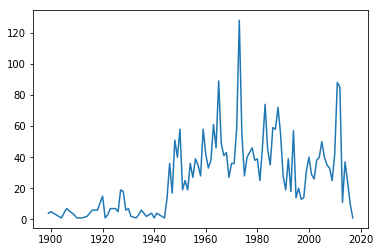

In [34]:
plt.plot(df[df.instyear < 9999].groupby('instyear')['sso_id'].count())

## The plot below is similar, but only plots the top 20 install years.

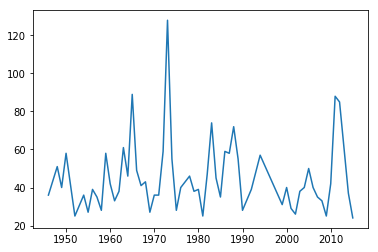

In [35]:
plt.plot(df.instyear.value_counts()[df.instyear.value_counts() > 20].sort_index())

## Below is showing spills by year.  Overall, they are trending down.

In [36]:
df.year.value_counts().sort_index()

2009    383
2010    538
2011    354
2012    374
2013    282
2014    196
2015    263
2016    304
2017    193
2018    259
2019     37
Name: year, dtype: int64

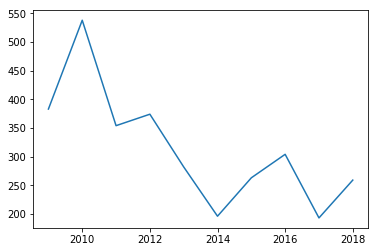

In [37]:
plt.plot(df[df.year < 2019].groupby('year')['sso_id'].count())

### Seasonality by week?  A note for this is that this doesn't separate week 1 in 2016 and week 1 in 2017.  This is just week overall.  We will resample later.

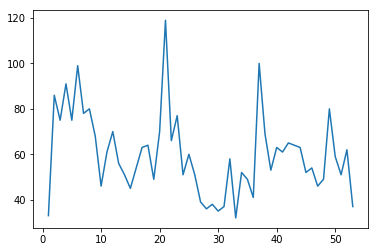

In [38]:
plt.plot(df.groupby('week')['sso_id'].count())

### Seasonality by day of month?  Similar as above, not resampled, but just all observations grouped by month of the year.

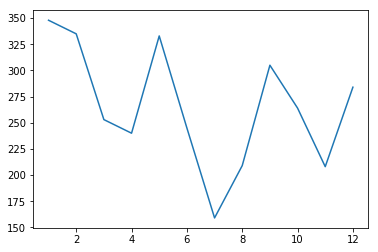

In [39]:
plt.plot(df.groupby('month')['sso_id'].count())

## The thought is that grease caused spills can be something we can try to prevent, let's focus on those by year.  They have trended down as well.

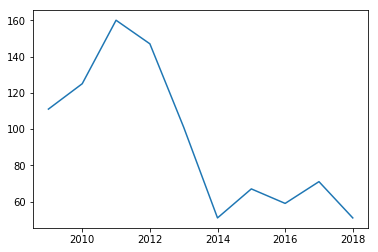

In [40]:
plt.plot(df[(df.cause == 'Grease') & (df.year < 2019)].groupby('year')['sso_id'].count())

## Colder months mean more grease clogs.  Grease solidifies in colder temperatures.

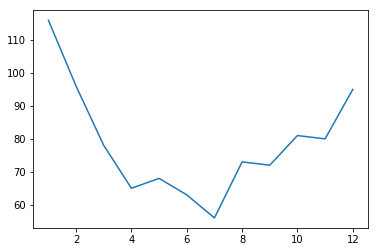

In [41]:
plt.plot(df[(df.cause == 'Grease') & (df.year < 2019)].groupby('month')['sso_id'].count())